limiting mag:
10.292929292929292


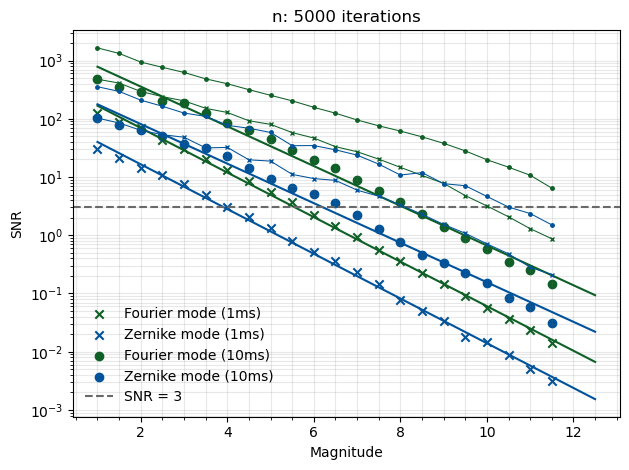

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def func(x, a, b, c):
    return a * np.log10(b * x) + c

with open('/Users/hurtado15/Documents/SUMMER_2025/python/data/snr.txt') as f:
    data = np.loadtxt(f)

# save rows as variables
mag_3, f_snr_1ms_3, z_snr_1ms_3, f_snr_10ms_3, z_snr_10ms_3 = data[0], data[1], data[2], data[3], data[4]
mag_10, f_snr_1ms_10, z_snr_1ms_10, f_snr_10ms_10, z_snr_10ms_10 = data[5], data[6], data[7], data[8], data[9]

x_range = np.linspace(np.min(mag_3), np.max(mag_3)+1, 100)
m_f1, b_f1 = np.polyfit(mag_3, np.log10(np.abs(f_snr_1ms_3)), 1)
m_z1, b_z1 = np.polyfit(mag_3, np.log10(np.abs(z_snr_1ms_3)), 1)
m_f10, b_f10 = np.polyfit(mag_3, np.log10(np.abs(f_snr_10ms_3)), 1)
m_z10, b_z10 = np.polyfit(mag_3, np.log10(np.abs(z_snr_10ms_3)), 1)

x_range_10 = np.linspace(np.min(mag_10), np.max(mag_10)+1, 100)
m_f1_10, b_f1_10 = np.polyfit(mag_10, np.log10(np.abs(f_snr_1ms_10)), 1)
m_z1_10, b_z1_10 = np.polyfit(mag_10, np.log10(np.abs(z_snr_1ms_10)), 1)
m_f10_10, b_f10_10 = np.polyfit(mag_10, np.log10(np.abs(f_snr_10ms_10)), 1)
m_z10_10, b_z10_10 = np.polyfit(mag_10, np.log10(np.abs(z_snr_10ms_10)), 1)

l_1 = 10**(m_f1_10 *x_range_10 + b_f1_10)

print(f'limiting mag:')
print(x_range[np.min(np.where(l_1 <= 3))])

plt.figure()
plt.scatter(mag_3, np.abs(f_snr_1ms_3), label='Fourier mode (1ms)', marker='x', color=(14/255, 96/255, 39/255))
plt.plot(x_range, 10**(m_f1*x_range + b_f1), color=(14/255, 96/255, 39/255))

plt.scatter(mag_3, np.abs(z_snr_1ms_3), label='Zernike mode (1ms)', marker='x', color=(0/255, 83/255, 154/255))
plt.plot(x_range, 10**(m_z1*x_range + b_z1), color=(0/255, 83/255, 154/255))

plt.scatter(mag_3, np.abs(f_snr_10ms_3), label='Fourier mode (10ms)', marker='o', color=(14/255, 96/255, 39/255))
plt.plot(x_range, 10**(m_f10*x_range + b_f10), color=(14/255, 96/255, 39/255))

plt.scatter(mag_3, np.abs(z_snr_10ms_3), label='Zernike mode (10ms)', marker='o', color=(0/255, 83/255, 154/255))
plt.plot(x_range, 10**(m_z10*x_range + b_z10), color=(0/255, 83/255, 154/255))

plt.axhline(y=3, color='dimgrey', label='SNR = 3', linestyle='--')
plt.legend(framealpha=0)
plt.title(f'n: 5000 iterations')
plt.grid(which='both', alpha = 0.15, c='dimgrey', zorder=0)
plt.minorticks_on()
plt.xlabel('Magnitude')
plt.ylabel('SNR')
plt.yscale('log')

plt.plot(mag_10, np.abs(f_snr_1ms_10), label='Fourier mode (1ms)', marker='x', linestyle='-', c=(14/255, 96/255, 39/255), markersize=2.5, lw=.75)
plt.plot(mag_10, np.abs(z_snr_1ms_10), label='Zernike mode (1ms)', marker='x', linestyle='-', c=(0/255, 83/255, 154/255), markersize=2.5, lw=.75)
plt.plot(mag_10, np.abs(f_snr_10ms_10), label='Fourier mode (10ms)', marker='o', linestyle='-', c=(14/255, 96/255, 39/255), markersize=2.5, lw=.75)
plt.plot(mag_10, np.abs(z_snr_10ms_10), label='Zernike mode (10ms)', marker='o', linestyle='-', c=(0/255, 83/255, 154/255), markersize=2.5, lw=.75)

plt.tight_layout()
plt.savefig('snr_mag_both.png', transparent=True, dpi=400)
plt.show()